In [144]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('wine.csv')

# Display the first few rows and column names
print(df.head())
print(df.columns)

   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 

#### This piece of code was written to get an understanding of the dataset

In [146]:
from sklearn.preprocessing import StandardScaler

# Extract predictors
features = df.drop(['quality', 'color'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
X_scaled

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]])

#### Standardising the dataset to feed to feed it in a format compatible for the Principal Components Analysis

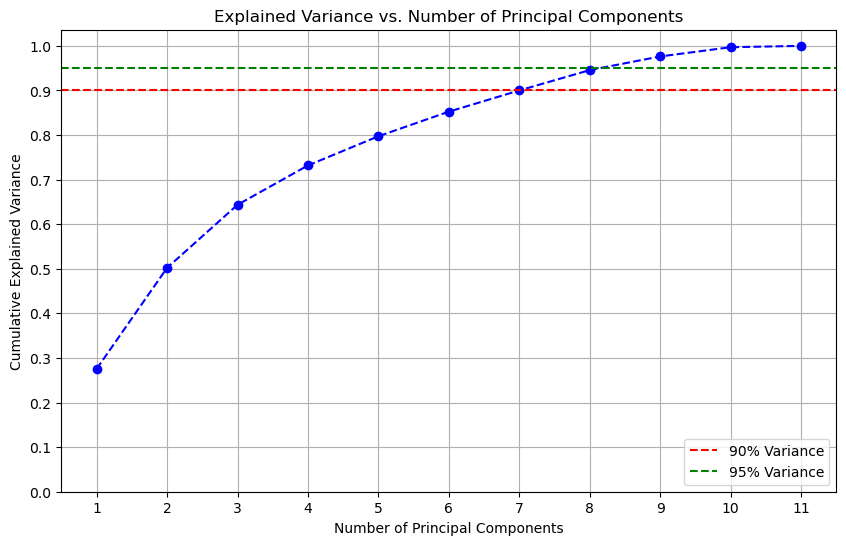

In [148]:
# Apply PCA
# Fit PCA on the data
pca = PCA().fit(X_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Number of components
num_components = np.arange(1, len(cumulative_variance) + 1)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(num_components, cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(num_components)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend(loc='lower right')
plt.show()

### This Graph is a representation of amount of variance explained vs the number of principal components used. 80% of the variance can be explained by using 5 Principal Components

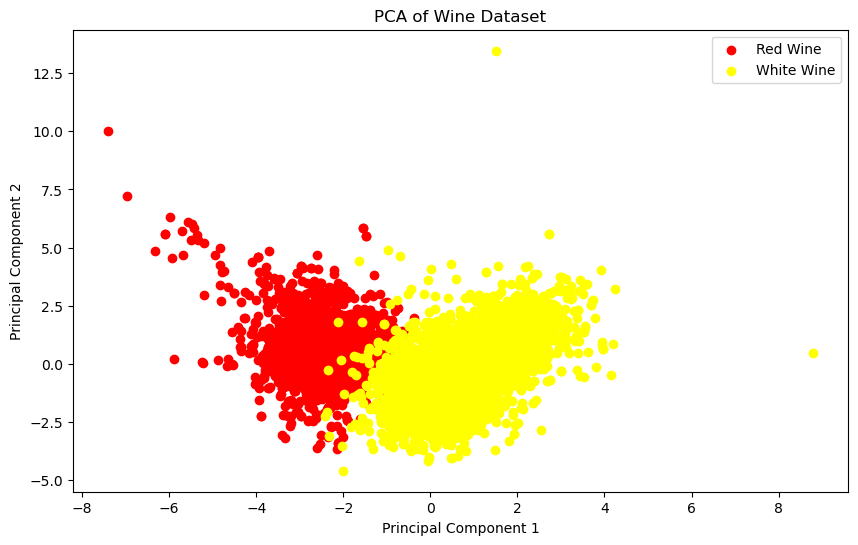

In [150]:
# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[df['color'] == 'red', 0], X_pca[df['color'] == 'red', 1], color='red', label='Red Wine')
plt.scatter(X_pca[df['color'] == 'white', 0], X_pca[df['color'] == 'white', 1], color='yellow', label='White Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend()
plt.show()

#### As you can see from the graph even the first two Principal Components alone are able to do a good job in differentiating the wines based on color 

Explained Variance Ratio (Proportion of Variance Explained by Each Component):
[0.2754426  0.22671146 0.14148609 0.08823201 0.06544317 0.05521016
 0.04755989 0.04559184 0.03063855 0.02069961 0.00298462]

Cumulative Explained Variance (Total Variance Explained by the Selected Components):
[0.2754426  0.50215406 0.64364015 0.73187216 0.79731533 0.85252548
 0.90008537 0.94567722 0.97631577 0.99701538 1.        ]
Loadings (Contribution of Each Predictor to the Principal Components):
                           PC1       PC2
fixed.acidity        -0.238799  0.336355
volatile.acidity     -0.380757  0.117550
citric.acid           0.152388  0.183299
residual.sugar        0.345920  0.329914
chlorides            -0.290113  0.315258
free.sulfur.dioxide   0.430914  0.071933
total.sulfur.dioxide  0.487418  0.087266
density              -0.044937  0.584037
pH                   -0.218686 -0.155869
sulphates            -0.294135  0.191716
alcohol              -0.106437 -0.465058


<Figure size 1200x800 with 0 Axes>

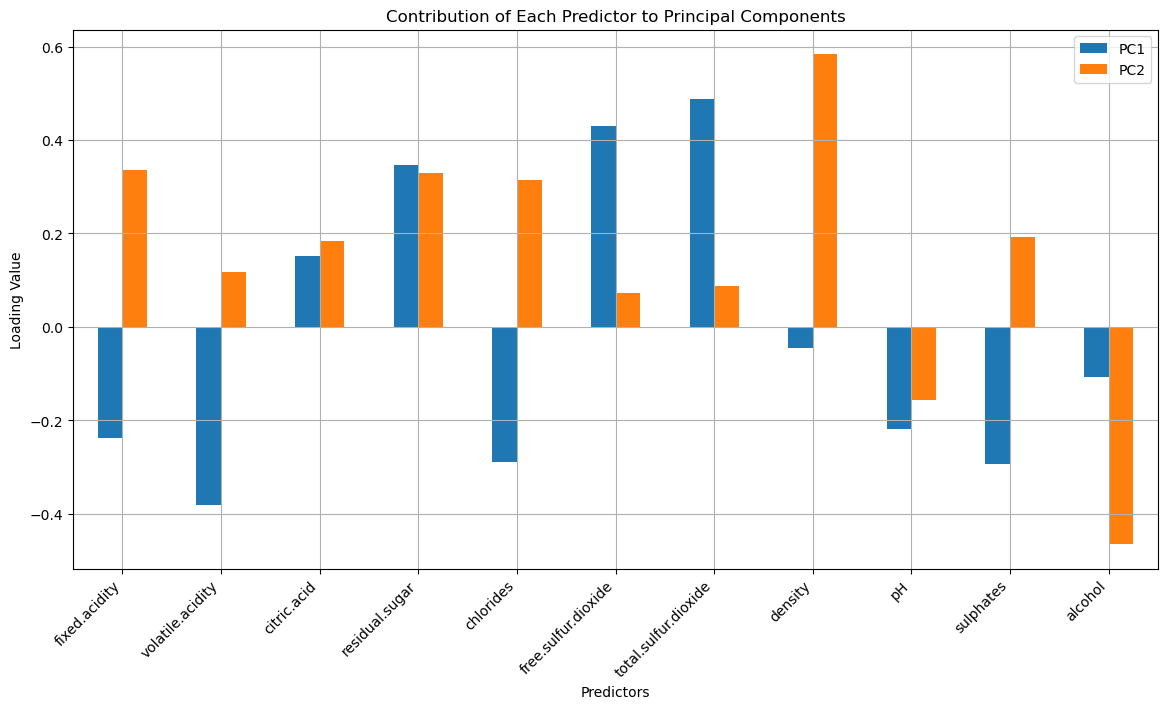

In [154]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Components (principal axes)
components = pca.components_

# Explained variance for each component
explained_variance = pca.explained_variance_

# Print numerical summary
print("Explained Variance Ratio (Proportion of Variance Explained by Each Component):")
print(explained_variance_ratio)


print("\nCumulative Explained Variance (Total Variance Explained by the Selected Components):")
print(np.cumsum(explained_variance_ratio))
loadings = pca.components_

# Create a DataFrame to display the loadings for each predictor
loadings_df = pd.DataFrame(loadings[:2].T, columns=['PC1', 'PC2'], index=features.columns)

print("Loadings (Contribution of Each Predictor to the Principal Components):")
print(loadings_df)
# Plot the contribution of each predictor to the principal components
plt.figure(figsize=(12, 8))
loadings_df.plot(kind='bar', figsize=(14, 7))
plt.title('Contribution of Each Predictor to Principal Components')
plt.ylabel('Loading Value')
plt.xlabel('Predictors')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

#### This graph depicts the contribution of each predictor to the principal components. It goes to show that PC1 is able to capture the difference in color of wines based on  acidity, chlorides,  sulphur dioxide, density and sulphates.


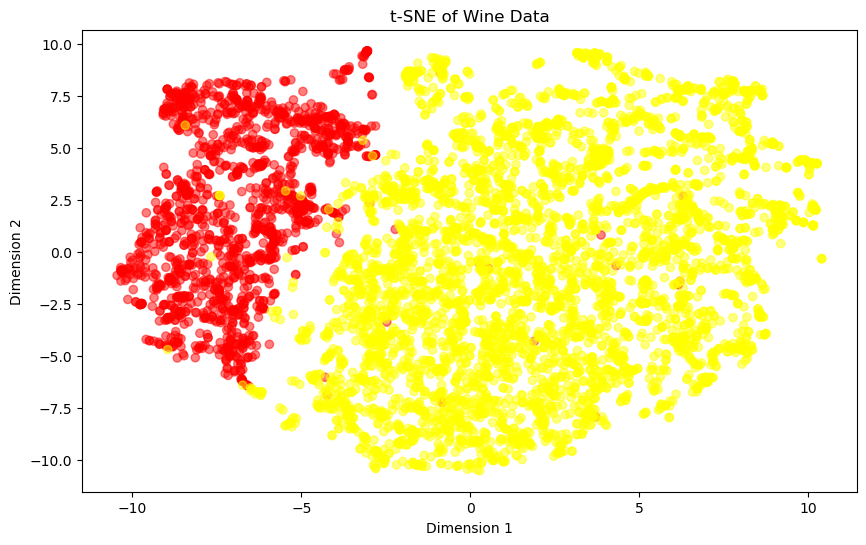

In [156]:
from sklearn.manifold import TSNE
labels = df[['color']] 
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X_scaled)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], 
            c=labels['color'].map({'red': 0, 'white': 1}), 
            cmap='autumn', alpha=0.5)
plt.title('t-SNE of Wine Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Run K-Means on the t-SNE output
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)

kmeans_labels = kmeans.fit_predict(tsne_result)

# Step 2: Map the K-Means clusters to the actual labels
# Since KMeans labels might not correspond directly to 'red' and 'white', we'll adjust them
# We know 'red' is mapped to 0 and 'white' to 1 in your code, so let's map clusters accordingly

# Create a mapping of cluster labels to the most common actual label in that cluster
cluster_to_color = {}
for cluster in np.unique(kmeans_labels):
    # Find the most common actual color in each cluster
    most_common_color = labels['color'][kmeans_labels == cluster].mode()[0]
    cluster_to_color[cluster] = 0 if most_common_color == 'red' else 1

# Convert cluster labels to color labels
mapped_kmeans_labels = np.array([cluster_to_color[label] for label in kmeans_labels])

# Step 3: Calculate the accuracy
actual_labels = labels['color'].map({'red': 0, 'white': 1}).values
accuracy = accuracy_score(actual_labels, mapped_kmeans_labels)

print(f"Accuracy of K-Means on t-SNE output: {accuracy * 100:.2f}%")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)




kmeans_labels = kmeans.fit_predict(X_pca)

# Step 3: Map the K-Means clusters to the actual labels (wine color)
# Since KMeans labels might not correspond directly to 'red' and 'white', we'll adjust them
# We know 'red' is mapped to 0 and 'white' to 1 in your code, so let's map clusters accordingly

cluster_to_color = {}
for cluster in np.unique(kmeans_labels):
    # Find the most common actual color in each cluster
    most_common_color = labels['color'][kmeans_labels == cluster].mode()[0]
    cluster_to_color[cluster] = 0 if most_common_color == 'red' else 1

# Convert cluster labels to color labels
mapped_kmeans_labels = np.array([cluster_to_color[label] for label in kmeans_labels])

# Step 4: Calculate the accuracy
actual_labels = labels['color'].map({'red': 0, 'white': 1}).values
accuracy = accuracy_score(actual_labels, mapped_kmeans_labels)

print(f"Accuracy of K-Means on PCA-transformed data: {accuracy * 100:.2f}%")


Accuracy of K-Means on t-SNE output: 75.39%
Accuracy of K-Means on PCA-transformed data: 98.29%


#### Upon running the kmeans++ clustering, PCA is doing a better job than t-SNE in segregating the red and white wines!

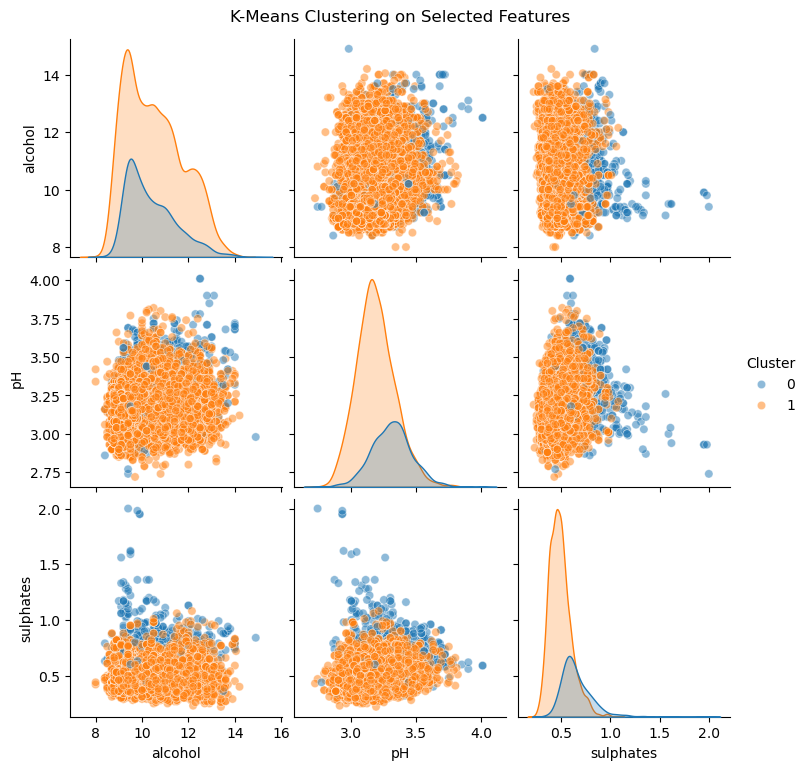

Wine_Type   red  white
Cluster               
0          1575     68
1            24   4830


In [160]:
# Extract the wine type for comparison
wine_type = df['color']  # Assuming 'color' column has wine types ('red' or 'white')

# Perform K-Means clustering on the scaled predictors
kmeans = KMeans(n_clusters=2, random_state=42)
wine_clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels and wine type to the DataFrame for comparison and visualization
df['Cluster'] = wine_clusters
df['Wine_Type'] = wine_type


selected_features = ['alcohol', 'pH', 'sulphates']
sns.pairplot(df, vars=selected_features, hue='Cluster', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('K-Means Clustering on Selected Features', y=1.02)
plt.show()

# Compare clusters with actual wine types
cluster_vs_type = pd.crosstab(df['Cluster'], df['Wine_Type'])
print(cluster_vs_type)

#### The K-Means clustering has achieved an accuracy of approximately 98.59%, indicating that it is highly effective in distinguishing between red and white wines based on the features provided. 

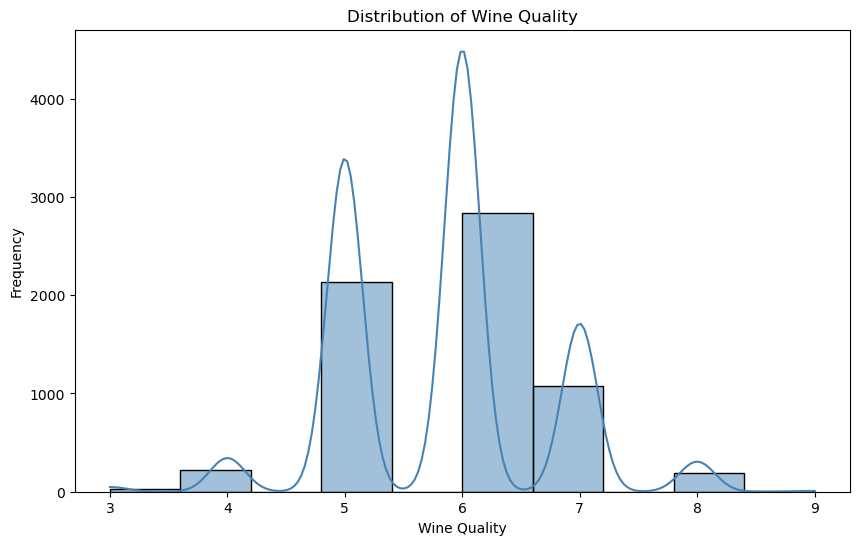

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], kde=True, bins=10, color='steelblue')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.show()

#### Based on this distribution it is fair to say that Wine quality 5 or 6 is the midpoint where there are eqaul number of wines on either side


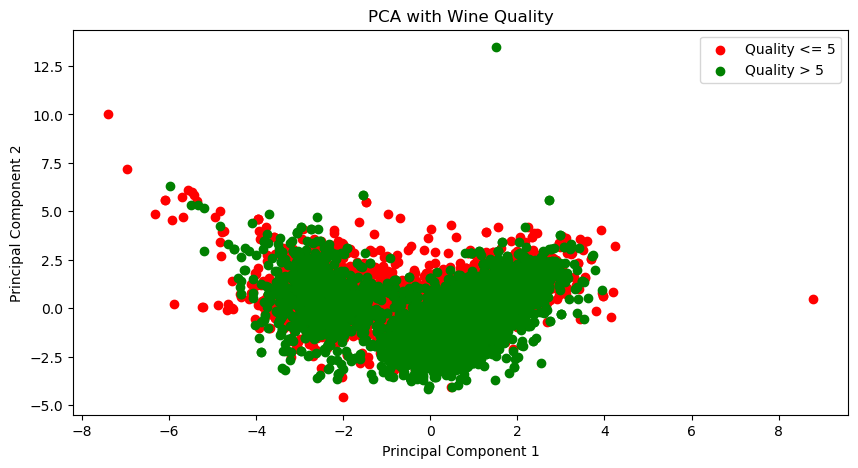

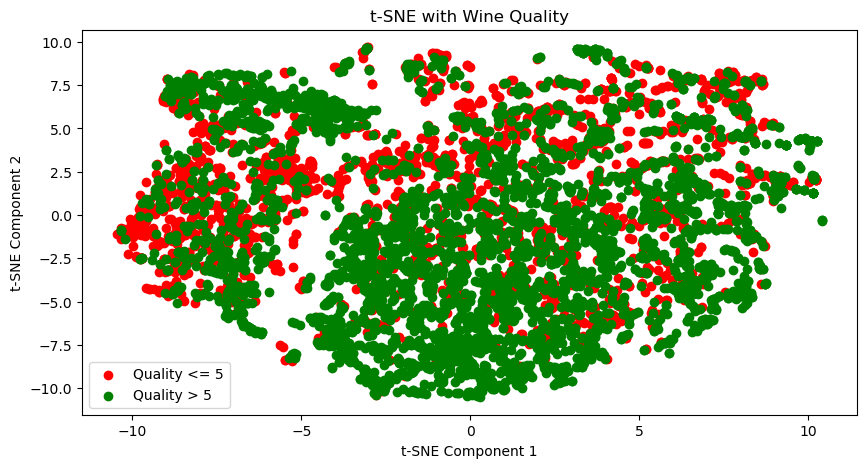

In [161]:
# Plot quality on PCA
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[df['quality'] <= 5, 0], X_pca[df['quality'] <= 5, 1], color='red', label='Quality <= 5')
plt.scatter(X_pca[df['quality'] > 5, 0], X_pca[df['quality'] > 5, 1], color='green', label='Quality > 5')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Wine Quality')
plt.legend()
plt.show()

# Plot quality on t-SNE
plt.figure(figsize=(10, 5))
plt.scatter(tsne_result[df['quality'] <= 5, 0], tsne_result[df['quality'] <= 5, 1], color='red', label='Quality <= 5')
plt.scatter(tsne_result[df['quality'] > 5, 0], tsne_result[df['quality'] > 5, 1], color='green', label='Quality > 5')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE with Wine Quality')
plt.legend()
plt.show()

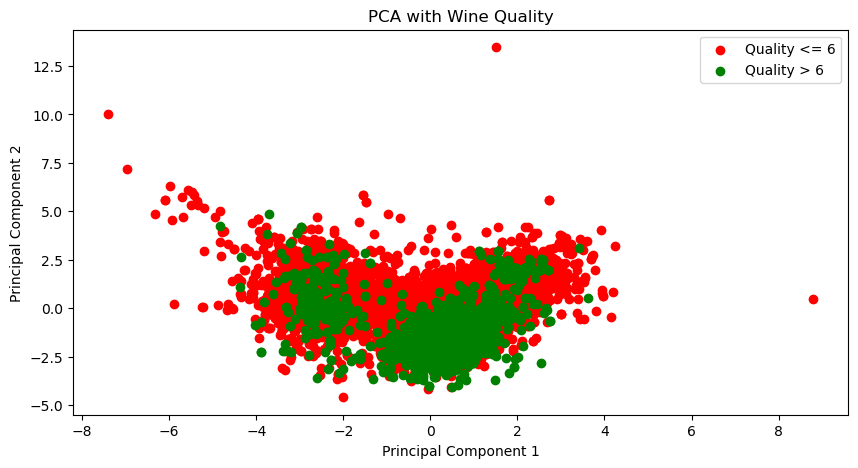

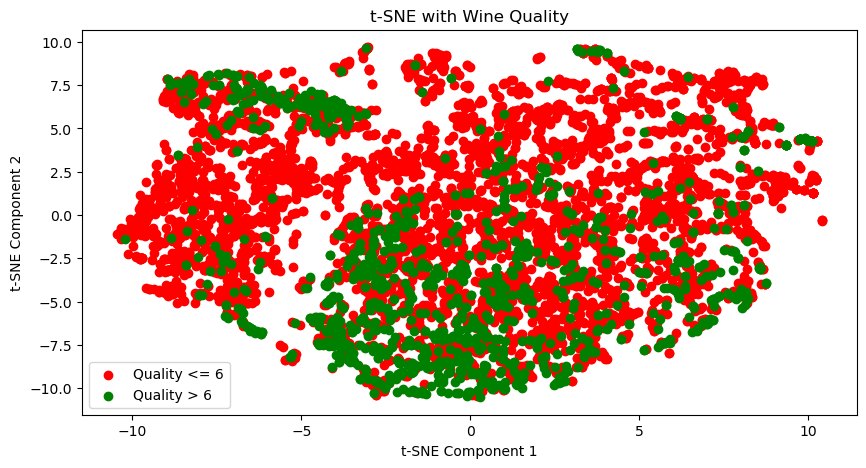

In [164]:
# Plot quality on PCA
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[df['quality'] <= 6, 0], X_pca[df['quality'] <= 6, 1], color='red', label='Quality <= 6')
plt.scatter(X_pca[df['quality'] > 6, 0], X_pca[df['quality'] > 6, 1], color='green', label='Quality > 6')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Wine Quality')
plt.legend()
plt.show()

# Plot quality on t-SNE
plt.figure(figsize=(10, 5))
plt.scatter(tsne_result[df['quality'] <= 6, 0], tsne_result[df['quality'] <= 6, 1], color='red', label='Quality <= 6')
plt.scatter(tsne_result[df['quality'] > 6, 0], tsne_result[df['quality'] > 6, 1], color='green', label='Quality > 6')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE with Wine Quality')
plt.legend()
plt.show()


#### We are unable to segregate the wine quality based on the clustering techniques at the split of wine quality at 5 or 7 (even though wine quality 7 is painting a relatively better picture)
